Импорт библиотек

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Информация о датасете:

Датасет был взят с сайта: https://www.kaggle.com/datasets/fatihyavuzz/studentperformancefactors,

он содержит информацию о студентах и различных факторах, которые могут влиять на их академическую успеваемость

In [249]:
data = pd.read_csv('../data/StudentPerformanceFactors.csv', delimiter=',')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Выбор колонок с данными для каждого графика 

In [179]:
normal_column = 'Sleep_Hours'
uniform_column = 'Attendance'
skewed_column = 'Tutoring_Sessions'

Построение графика нормального распределения

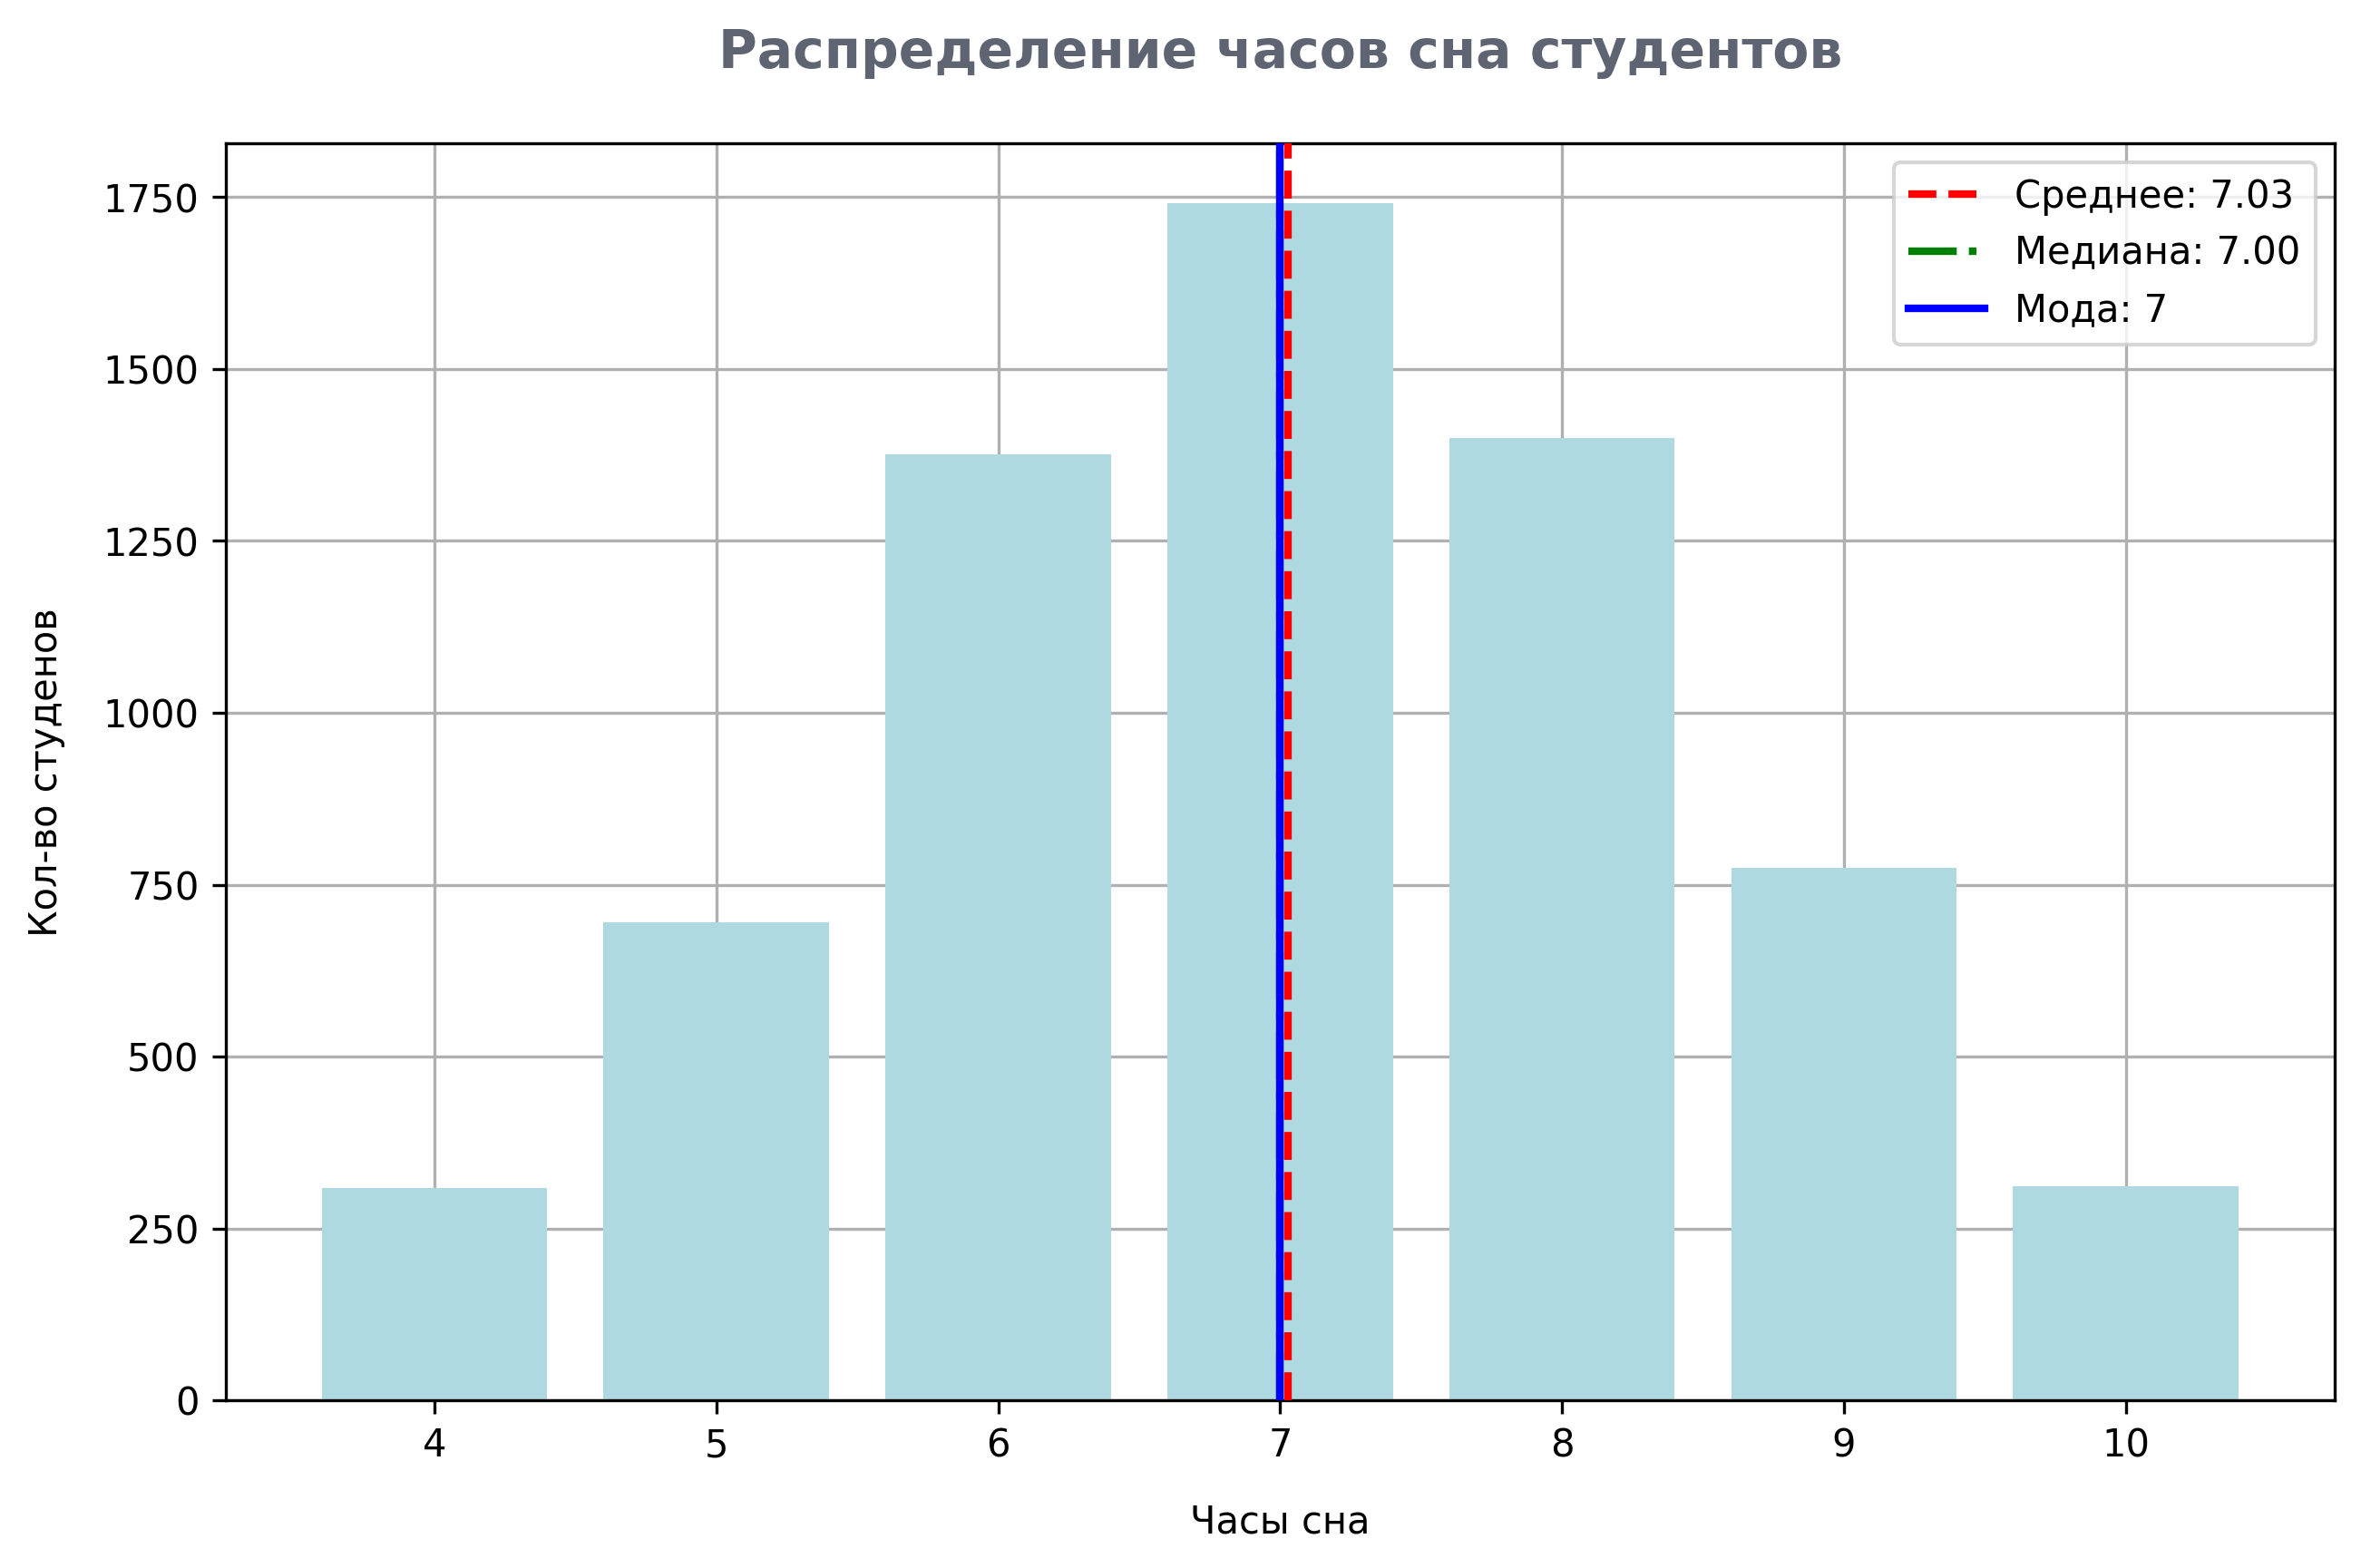

In [229]:
sleep_hours_count = data[normal_column].value_counts().sort_index()

x = sleep_hours_count.index
y = sleep_hours_count.values

# Расчет среднего, моды и медианы
mean = data[normal_column].mean()
median = data[normal_column].median()
mode = data[normal_column].mode()[0]

plt.figure(figsize=(10, 6), dpi=300)
plt.bar(x, y, zorder=2, color='#AED9E0')

# Добавление среднего, медианы и моды
plt.axvline(mean, color='red', zorder=3, linestyle='--', linewidth=2, label=f'Среднее: {mean:.2f}')
plt.axvline(median, color='green', zorder=3, linestyle='-.', linewidth=2, label=f'Медиана: {median:.2f}')
plt.axvline(mode, color='blue', zorder=3, linestyle='-', linewidth=2, label=f'Мода: {mode}')

plt.title('Распределение часов сна студентов', fontsize=14, fontweight='bold', pad=20, color='#5E6472')
plt.xlabel('Часы сна', labelpad=10)
plt.ylabel('Кол-во студенов', labelpad=10)

plt.legend()
plt.grid(True)
plt.show()

Построение графика равномерного распределения

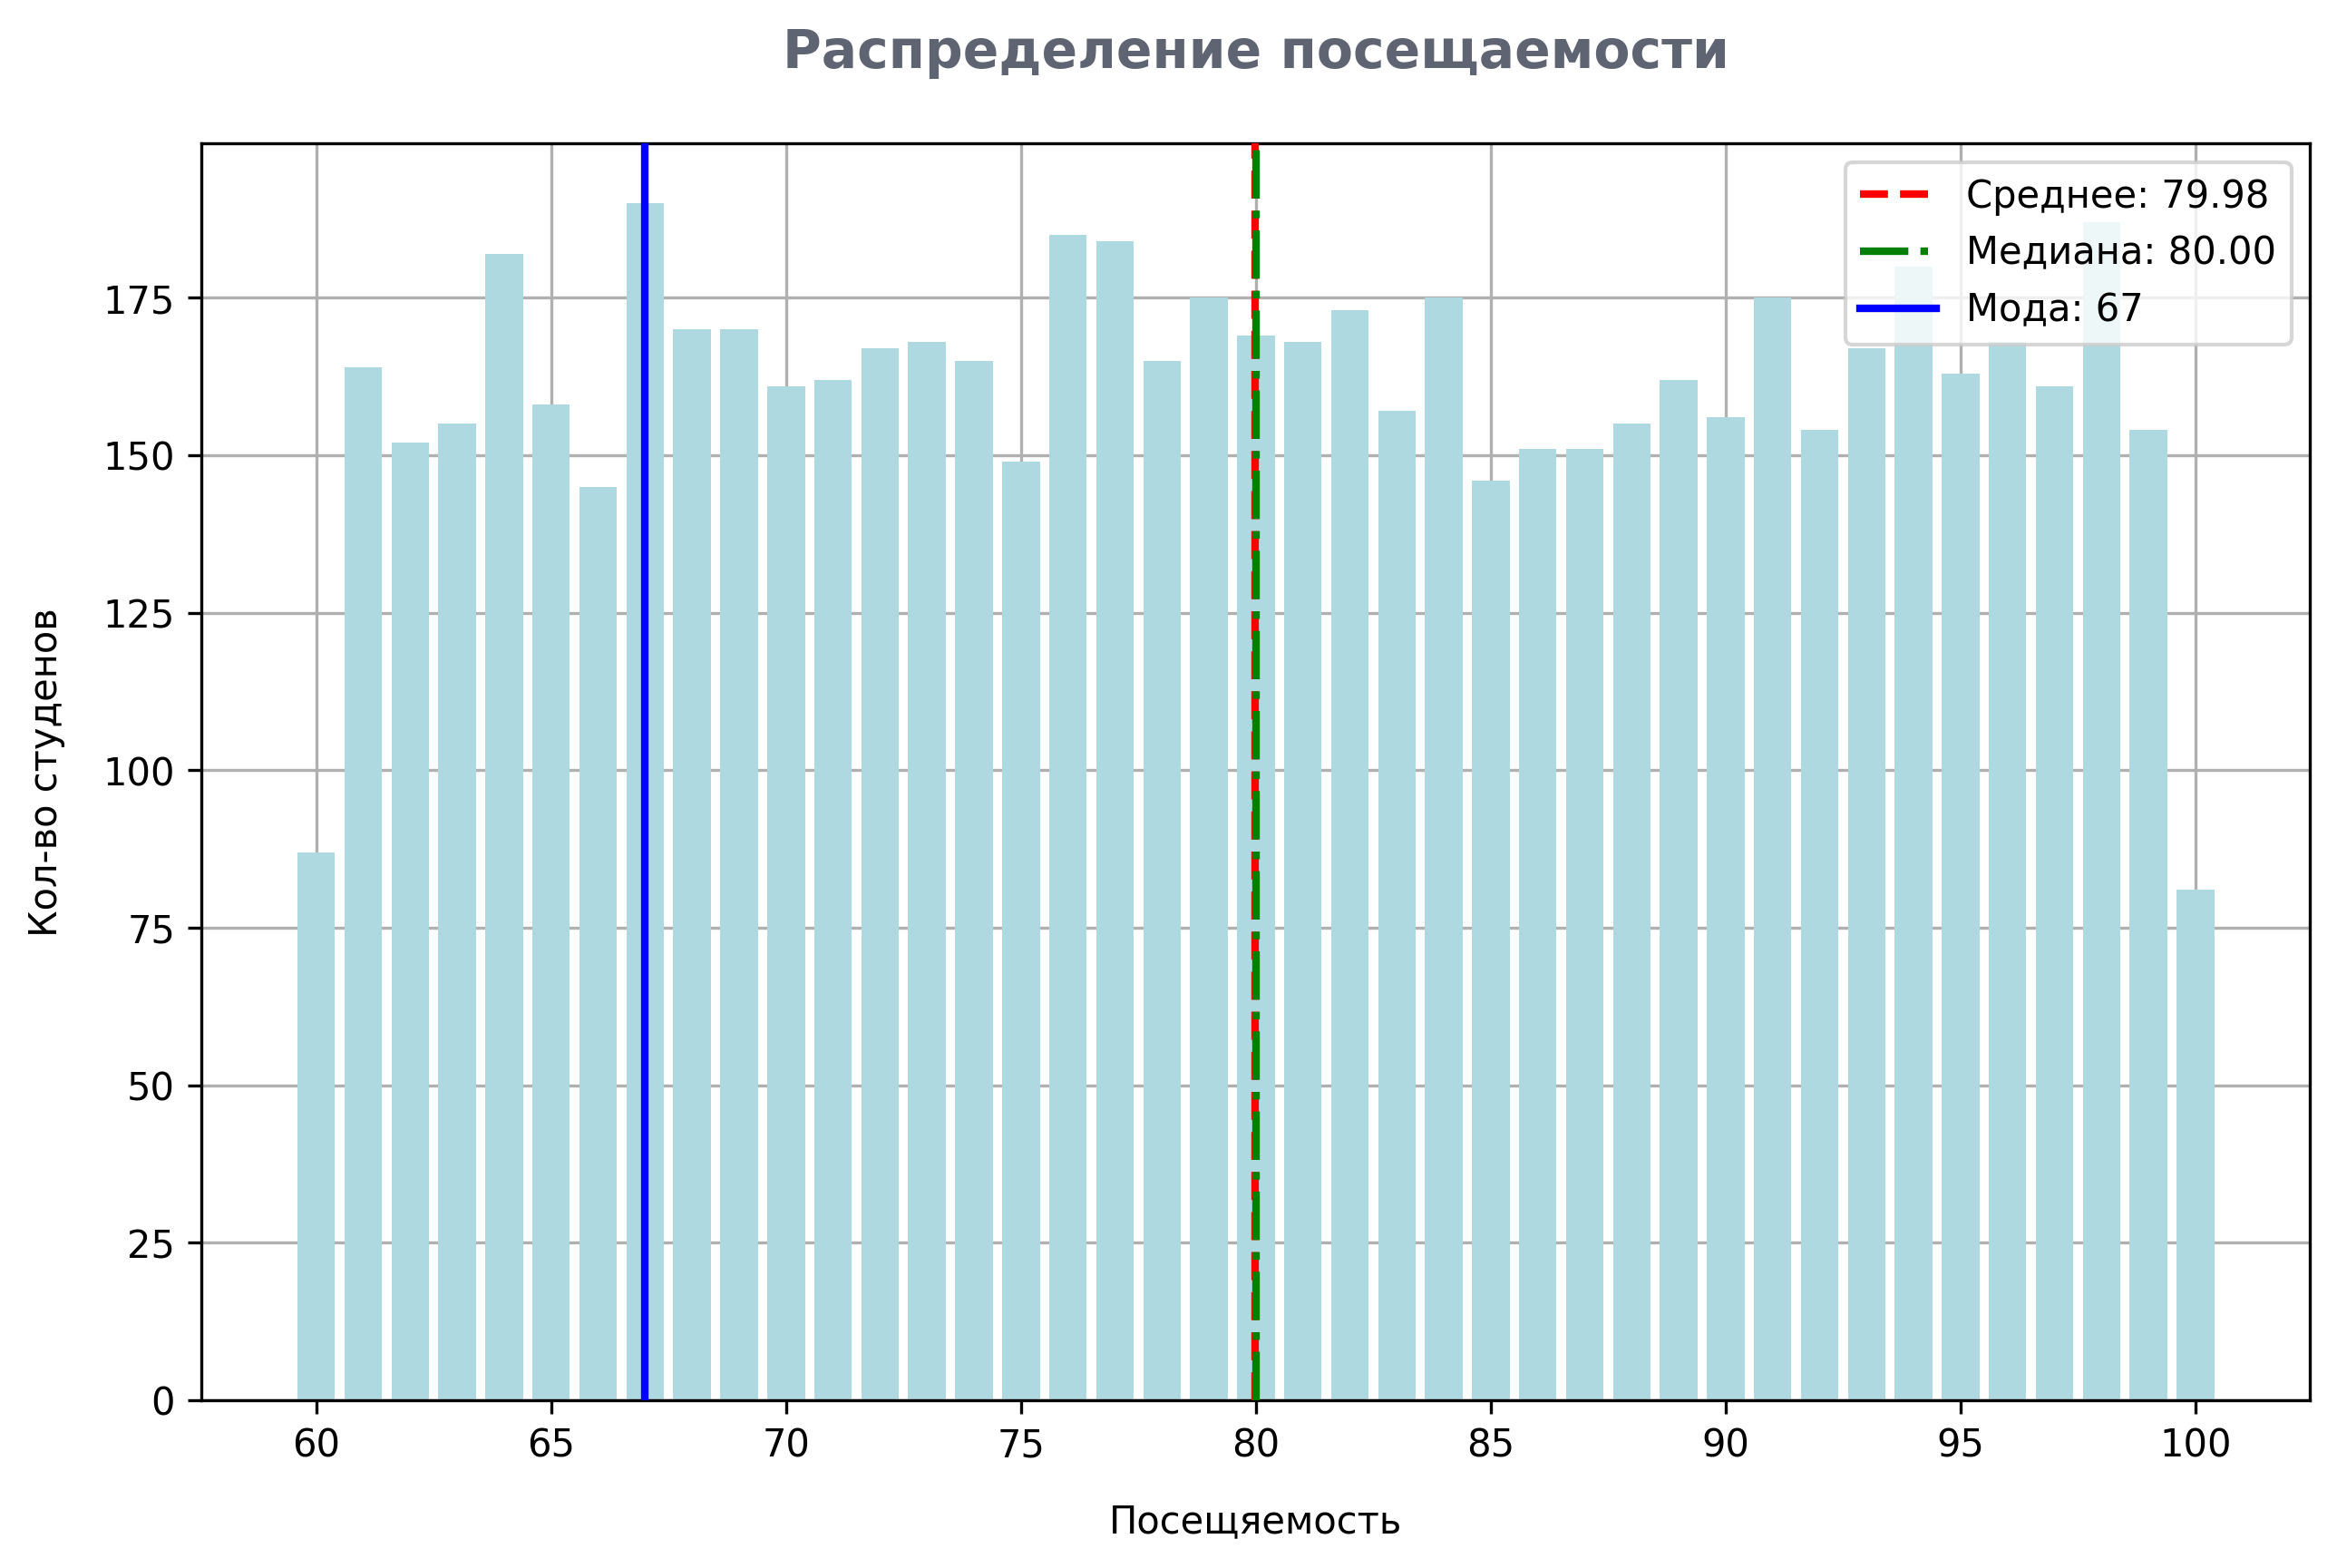

In [230]:
x = data[uniform_column].value_counts().sort_index().index
y = data[uniform_column].value_counts().sort_index().values

# Расчет среднего, моды и медианы
mean = data[uniform_column].mean()
median = data[uniform_column].median()
mode = data[uniform_column].mode()[0]

plt.figure(figsize=(10, 6), dpi=300)
plt.bar(x, y, zorder=2, color='#AED9E0')

# Добавление среднего, медианы и моды
plt.axvline(mean, color='red', zorder=3, linestyle='--', linewidth=2, label=f'Среднее: {mean:.2f}')
plt.axvline(median, color='green', zorder=3, linestyle='-.', linewidth=2, label=f'Медиана: {median:.2f}')
plt.axvline(mode, color='blue', zorder=3, linestyle='-', linewidth=2, label=f'Мода: {mode}')

plt.title('Распределение посещаемости', fontsize=14, fontweight='bold', pad=20, color='#5E6472')
plt.xlabel('Посещяемость', labelpad=10)
plt.ylabel('Кол-во студенов', labelpad=10)

plt.legend()
plt.grid(True)
plt.show()

Построение графика со смещённой медианной распределения

Мода: 1
Медиана: 1.0
Среднее: 1.4937187831088239

Размах данных: 8
Смещение медианы относительно среднего: 6.17%


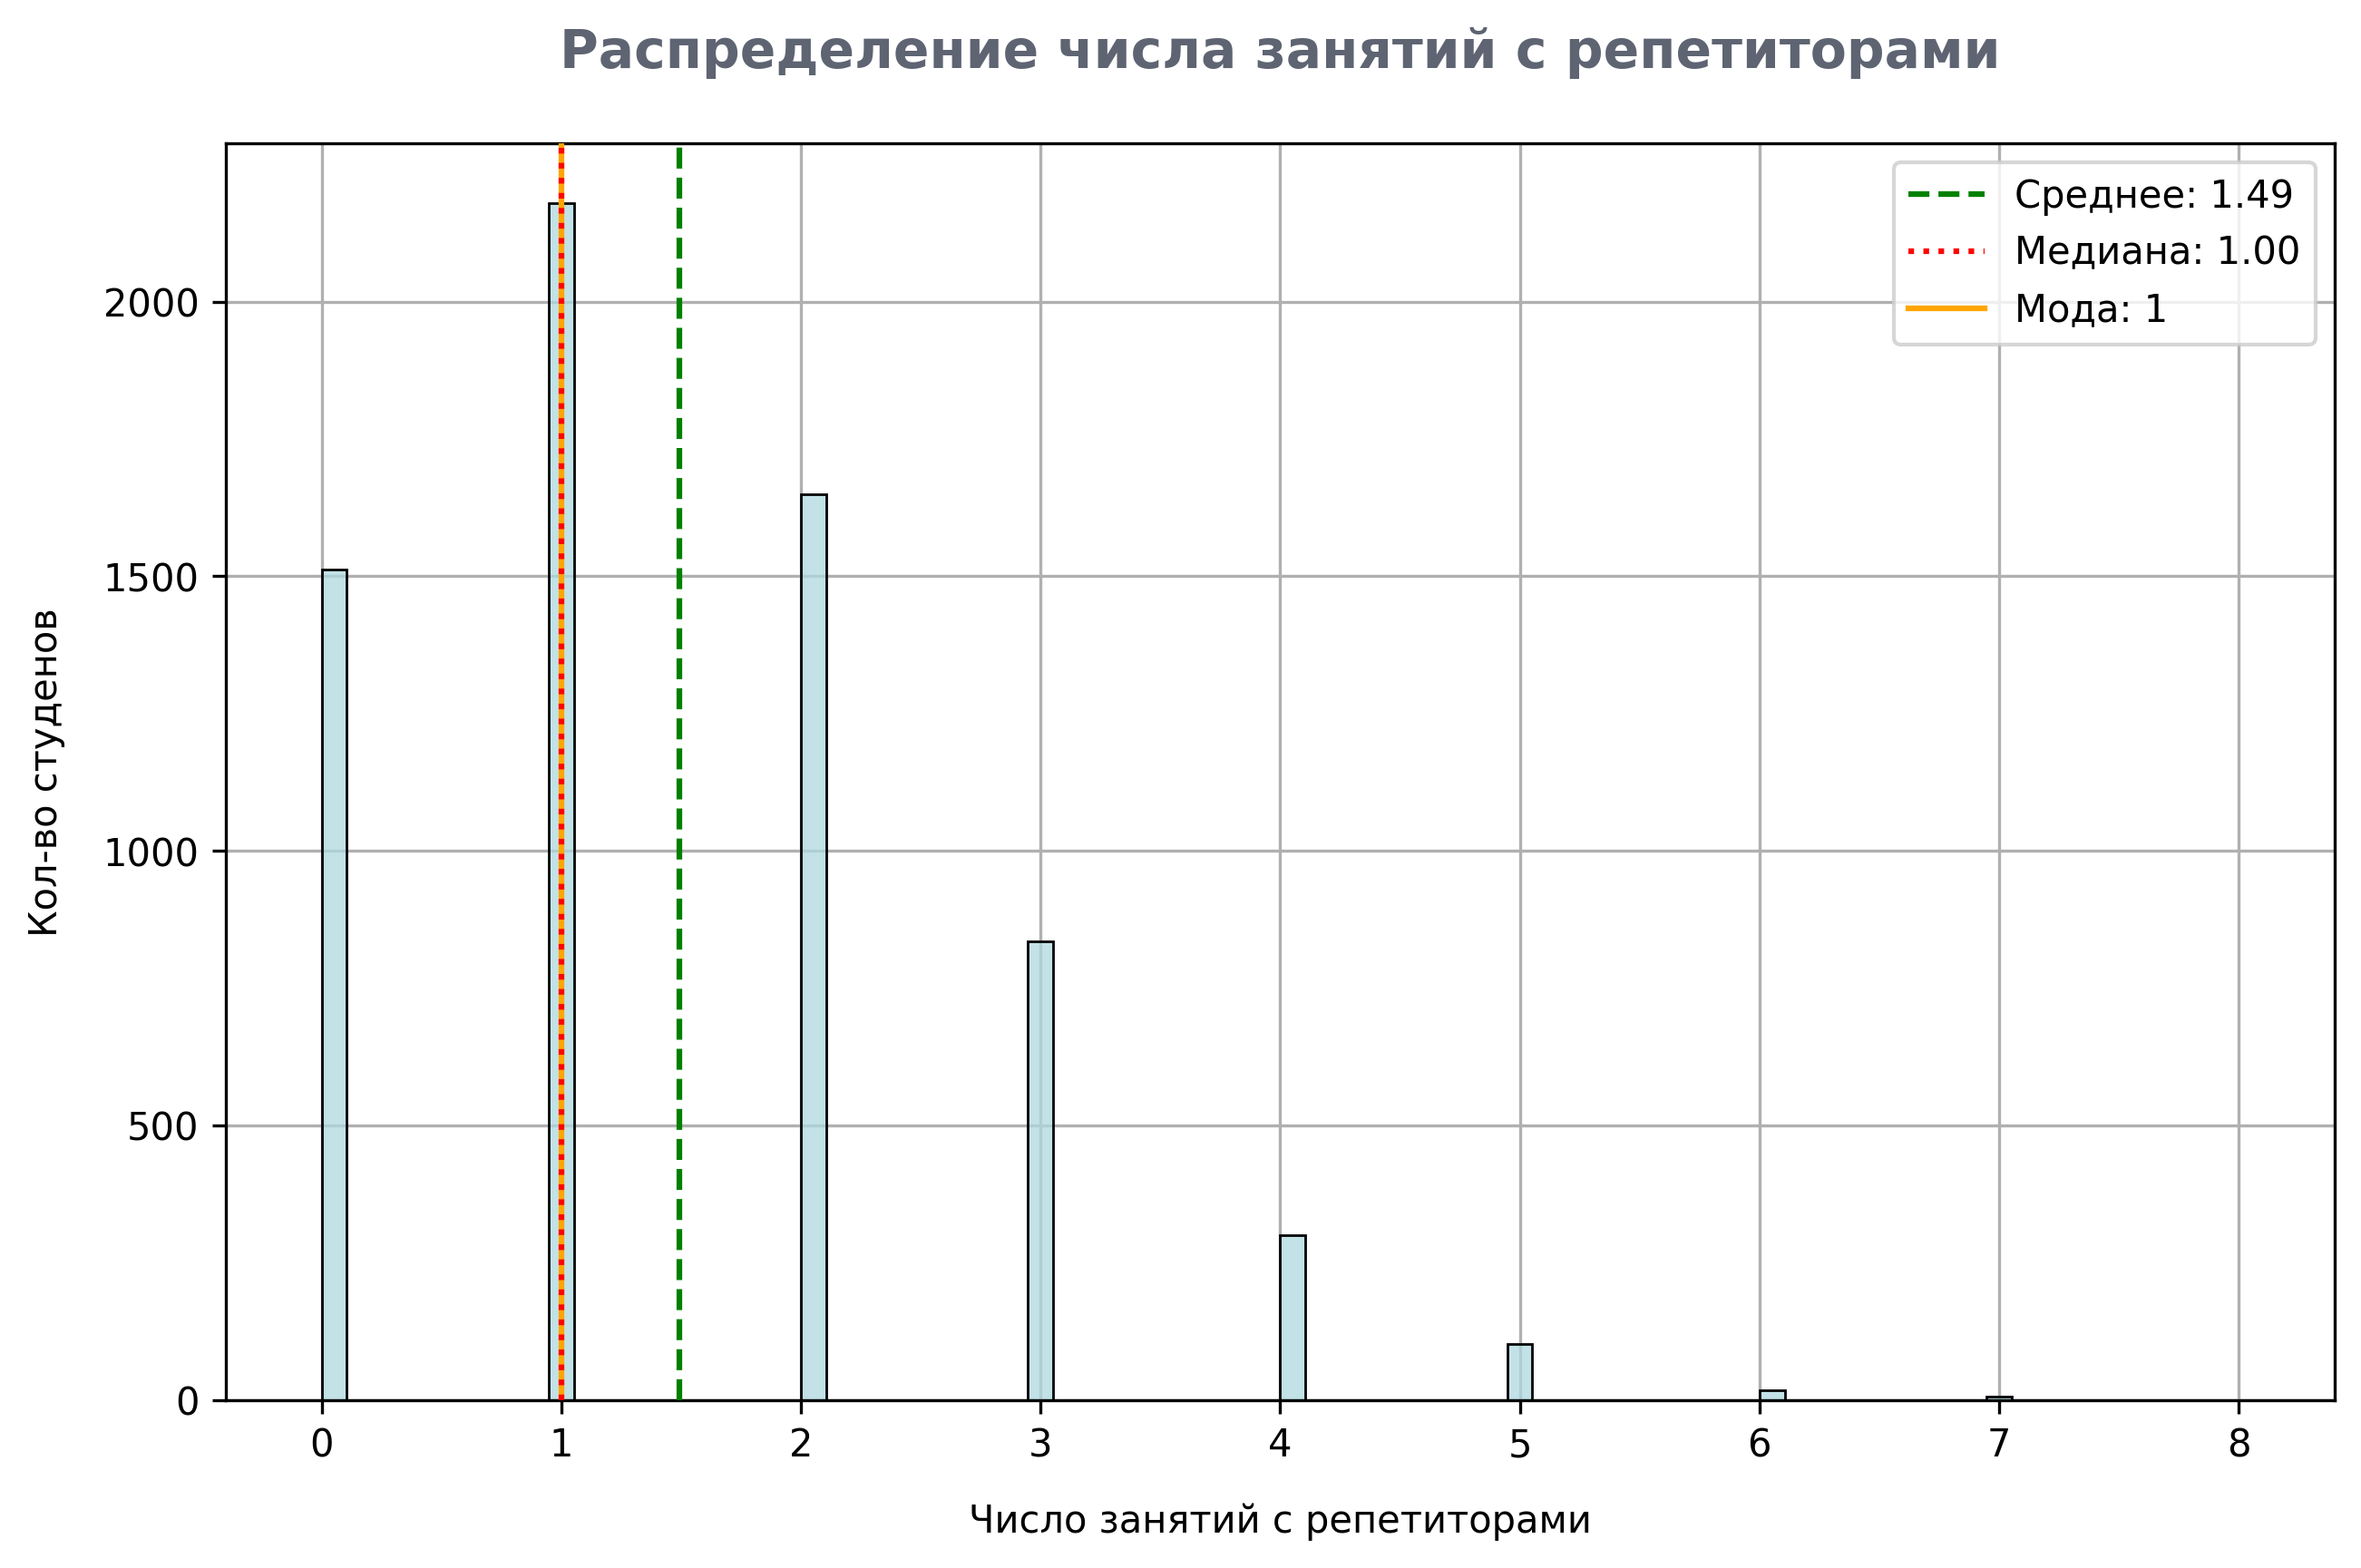

In [257]:
mean = data[skewed_column].mean()
median = data[skewed_column].median()
mode = data[skewed_column].mode()[0]

# Вычисление смещения
range_ = data[skewed_column].max() - data[skewed_column].min()
shift_percentage = abs((median - mean) / range_) * 100

plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(data[skewed_column], zorder=2, color='#AED9E0')

# Добавление среднего, медианы и моды
plt.axvline(mean, color='green', zorder=4, linestyle='--', linewidth=1.5, label=f'Среднее: {mean:.2f}')
plt.axvline(median, color='red', zorder=4, linestyle='dotted', linewidth=1.5, label=f'Медиана: {median:.2f}')
plt.axvline(mode, color='orange', zorder=3, linestyle='-', linewidth=1.5, label=f'Мода: {mode}')

print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Среднее: {mean}")
print()
print(f"Размах данных: {range_}")
print(f"Смещение медианы относительно среднего: {shift_percentage:.2f}%")

plt.title('Распределение числа занятий с репетиторами', fontsize=14, fontweight='bold', pad=20, color='#5E6472')
plt.xlabel('Число занятий с репетиторами', labelpad=10)
plt.ylabel('Кол-во студенов', labelpad=10)

plt.legend()
plt.grid(True, zorder=1)
plt.show()

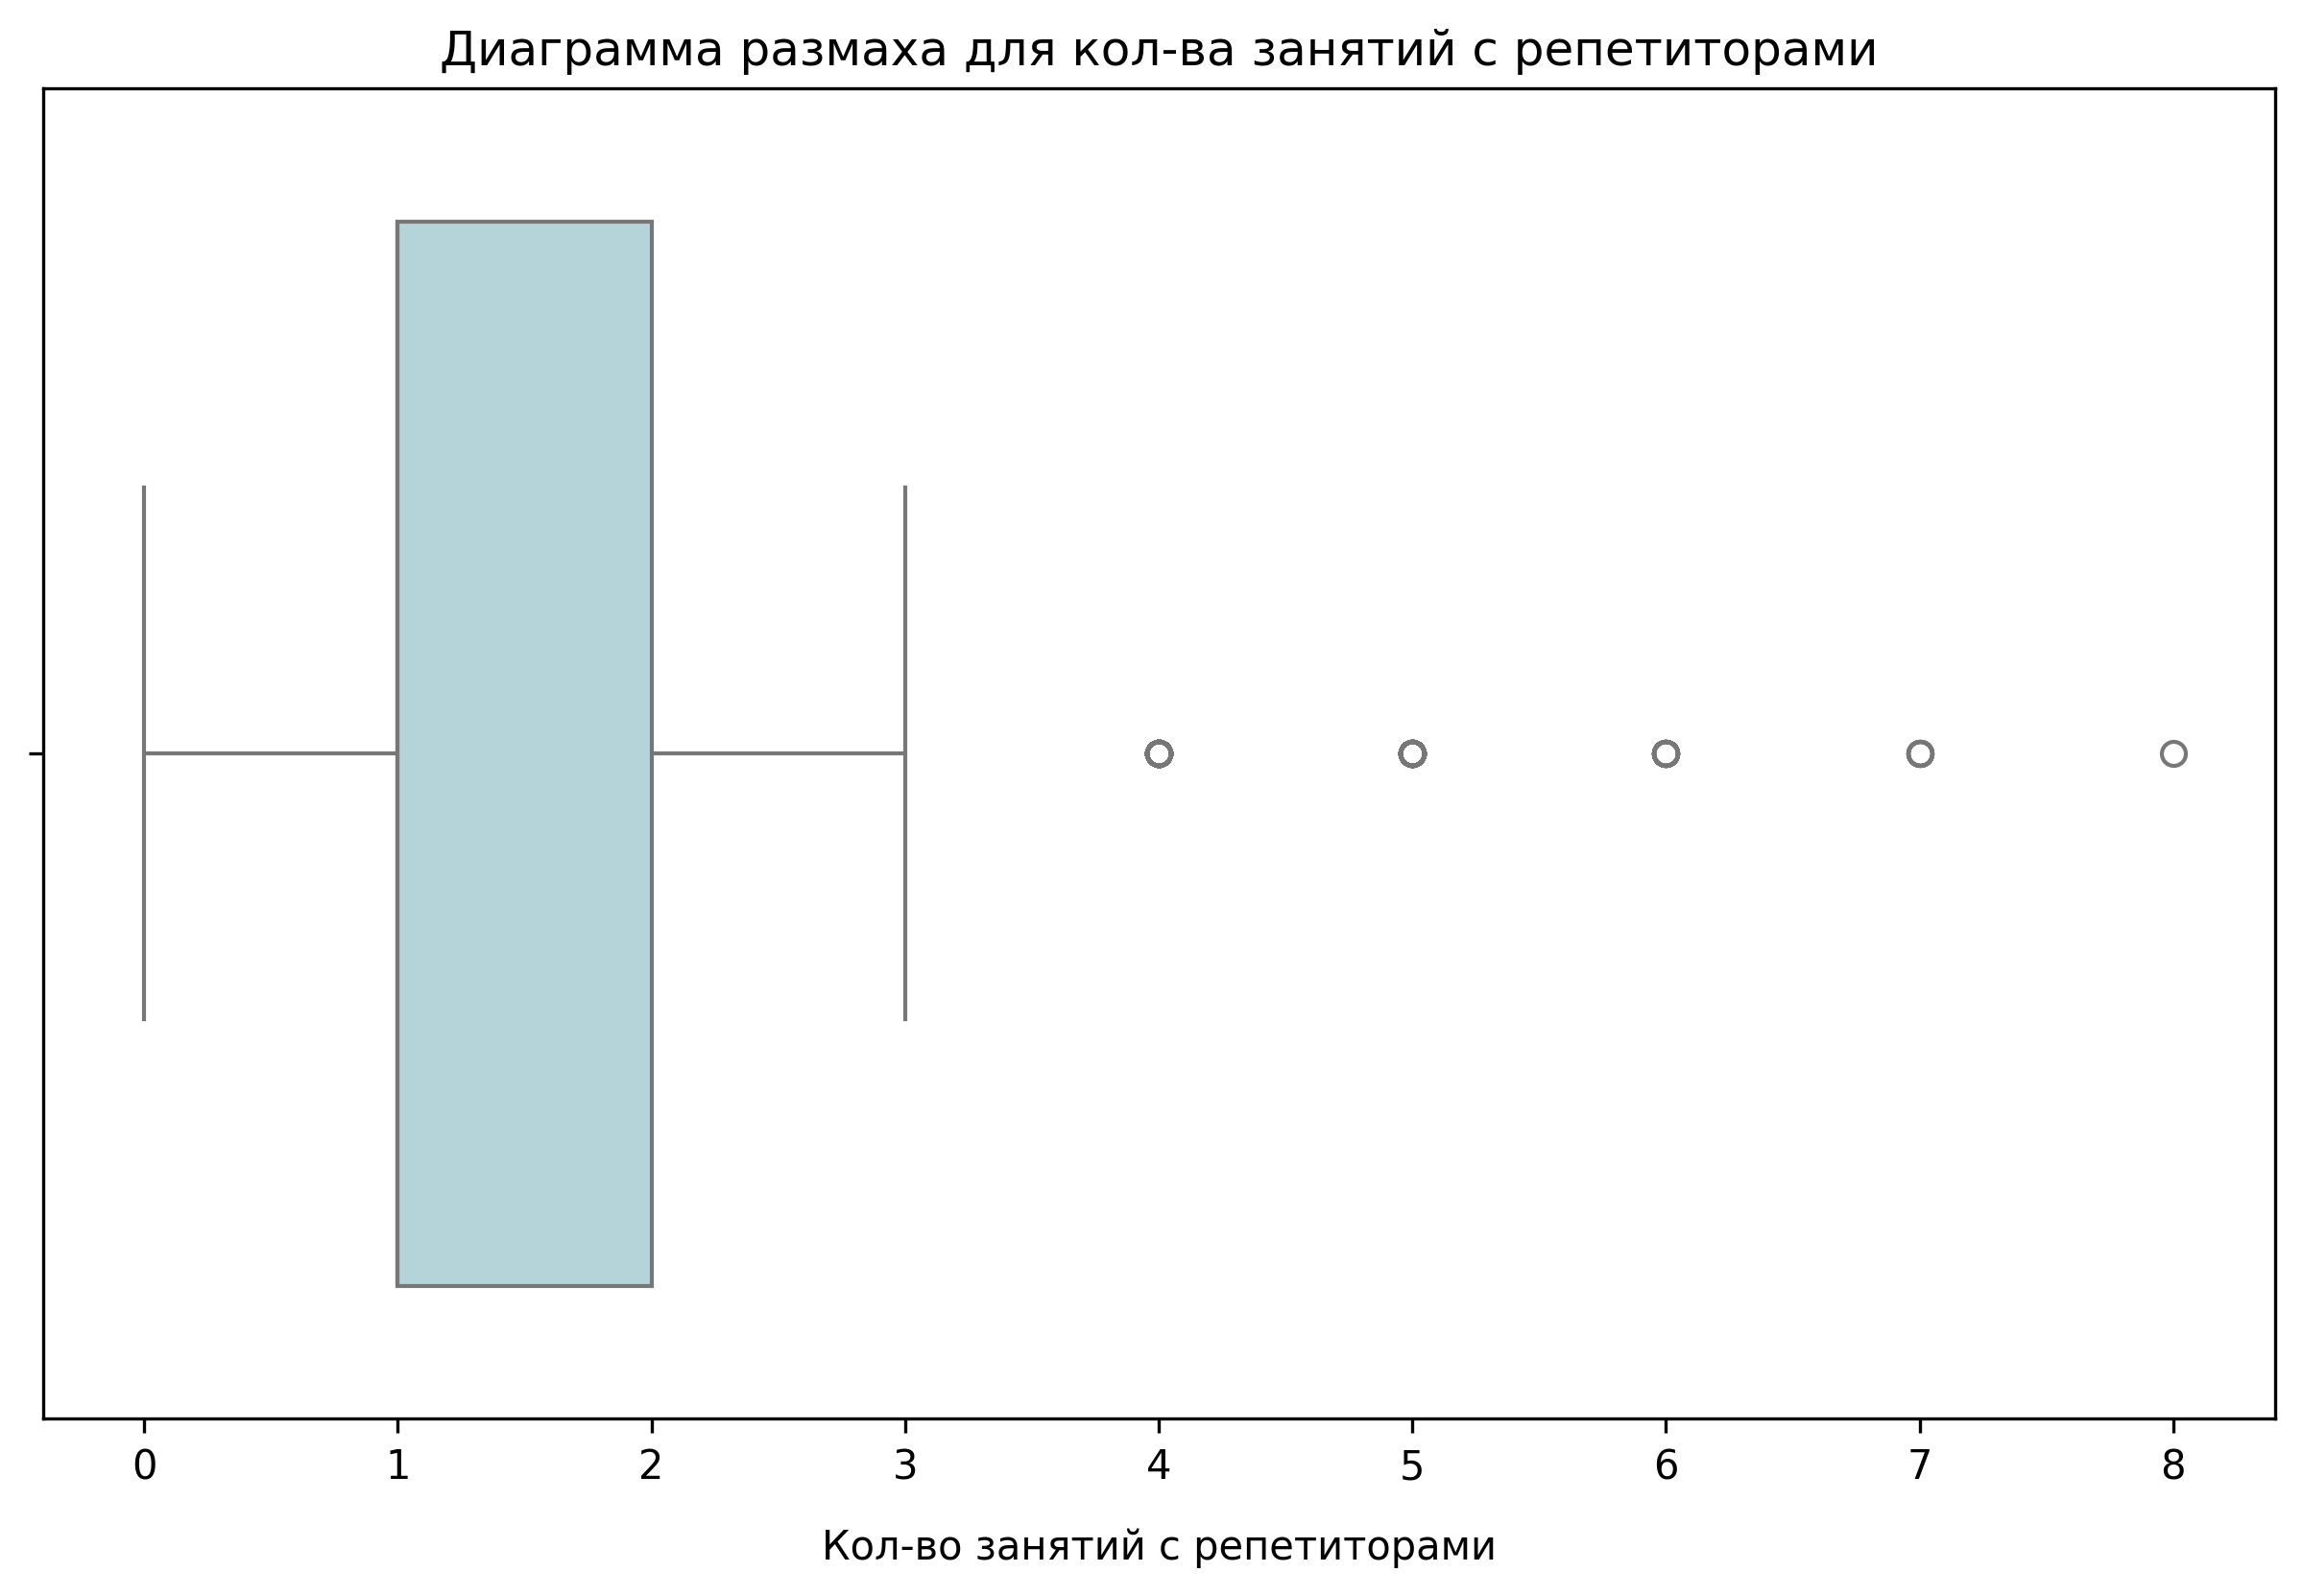

In [268]:
plt.figure(figsize=(10, 6), dpi=300)
sns.boxplot(x=data[skewed_column], color='#AED9E0')

plt.title('Диаграмма размаха для кол-ва занятий с репетиторами')
plt.xlabel('Кол-во занятий с репетиторами', labelpad=10)

plt.show()

Корреляция между Tutoring_Sessions и другими переменными:
                   Tutoring_Sessions  Exam_Score  Hours_Studied  \
Tutoring_Sessions           1.000000    0.156525      -0.014282   
Exam_Score                  0.156525    1.000000       0.445455   
Hours_Studied              -0.014282    0.445455       1.000000   
Motivation_Level           -0.012456   -0.014910       0.022092   

                   Motivation_Level  
Tutoring_Sessions         -0.012456  
Exam_Score                -0.014910  
Hours_Studied              0.022092  
Motivation_Level           1.000000  

Корреляция между синтетическим признаком и другими переменными:
                         tutoring_to_study_hours  Exam_Score  Hours_Studied  \
tutoring_to_study_hours                 1.000000   -0.019676      -0.377995   
Exam_Score                             -0.019676    1.000000       0.445455   
Hours_Studied                          -0.377995    0.445455       1.000000   
Motivation_Level                   

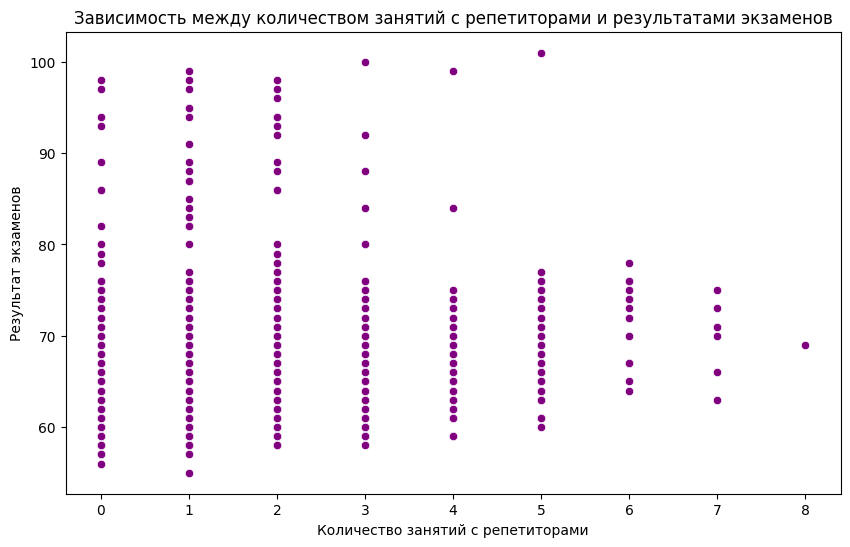

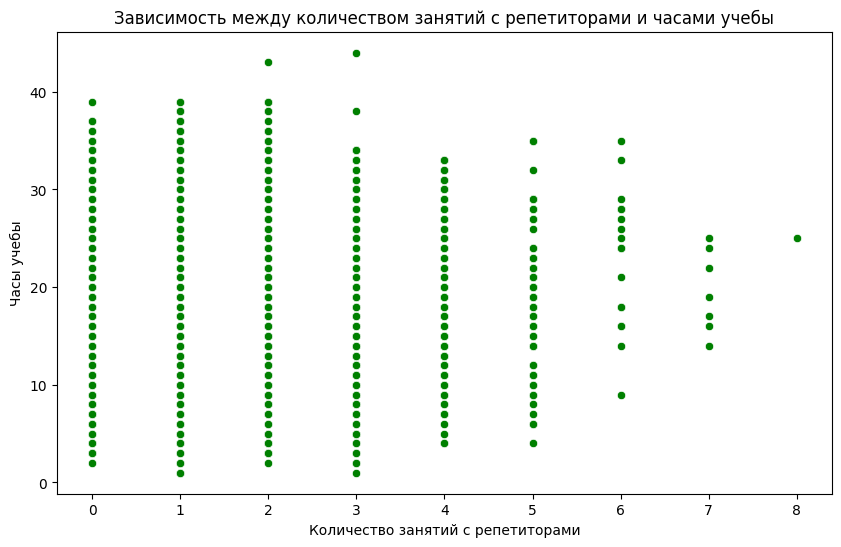

In [274]:
label_encoder = LabelEncoder()
data['Motivation_Level'] = label_encoder.fit_transform(data['Motivation_Level'])

correlation = data[['Tutoring_Sessions', 'Exam_Score', 'Hours_Studied', 'Motivation_Level']].corr()
print("Корреляция между Tutoring_Sessions и другими переменными:")
print(correlation)

# Построение синтетического признака (соотношение количества занятий с репетиторами и часов учебы)
data['tutoring_to_study_hours'] = data['Tutoring_Sessions'] / data['Hours_Studied']

# Корреляция синтетического признака с другими переменными
correlation_synthetic = data[['tutoring_to_study_hours', 'Exam_Score', 'Hours_Studied', 'Motivation_Level']].corr()
print("\nКорреляция между синтетическим признаком и другими переменными:")
print(correlation_synthetic)

# Группировка данных по количеству занятий с репетиторами и вычисление среднего значения других переменных
tutoring_group = data.groupby('Tutoring_Sessions').agg({'Exam_Score': 'mean', 'Hours_Studied': 'mean'})
print("\nСредние значения по группам Tutoring_Sessions:")
print(tutoring_group)

# Визуализация: Гистограмма зависимости между количеством занятий с репетиторами и результатами экзаменов
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Tutoring_Sessions'], y=data['Exam_Score'], color='purple')
plt.title('Зависимость между количеством занятий с репетиторами и результатами экзаменов')
plt.xlabel('Количество занятий с репетиторами')
plt.ylabel('Результат экзаменов')
plt.show()

# Визуализация: Гистограмма зависимости между количеством занятий с репетиторами и часами учебы
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Tutoring_Sessions'], y=data['Hours_Studied'], color='green')
plt.title('Зависимость между количеством занятий с репетиторами и часами учебы')
plt.xlabel('Количество занятий с репетиторами')
plt.ylabel('Часы учебы')
plt.show()

На основе проведенного анализа можно сформулировать несколько ключевых выводов:
	1.	Корреляция между переменными:
	•	Количество занятий с репетиторами демонстрирует слабую связь с результатами экзаменов, часами учебы и уровнем мотивации. Однако существует незначительная положительная корреляция между репетиторством и экзаменационными результатами (0.16), что может указывать на положительное влияние репетиторских занятий, но оно не является основным фактором успеха.
	•	Синтетический признак, который мы создали — соотношение количества занятий с репетитором к часам учебы (tutoring_to_study_hours), показал отрицательную корреляцию с часами учебы (-0.38). Это может свидетельствовать о том, что студенты, проводящие больше времени на занятиях с репетиторами, менее склонны к самостоятельной учебе.
	2.	Средние значения по группам Tutoring_Sessions:
	•	По мере увеличения количества занятий с репетиторами результаты экзаменов демонстрируют устойчивое повышение. Наибольшее улучшение оценок наблюдается в группе, имеющей 6 занятий, где зафиксирован пик (71.67).
	•	Часы учебы также увеличиваются с ростом числа занятий, что свидетельствует о более высокой вовлеченности студентов в учебный процесс при поддержке репетиторов.

Гипотеза о причинах отклонений:

Среди аномальных значений в данных, таких как выбросы на 4, 5, 6, 7, и 8 занятиях с репетитором, можно выдвинуть гипотезу о том, что оптимальное количество занятий с репетиторами для достижения высоких результатов на экзаменах составляет около 6 занятий. В этом случае репетиторская поддержка может быть наиболее эффективной. Студенты, проводящие более интенсивные занятия, возможно, теряют в эффективности из-за перегрузки или чрезмерной зависимости от репетитора, что ограничивает их способность к самостоятельному обучению. В то время как студенты, не получающие помощи от репетитора, могут показывать низкие результаты из-за недостаточной подготовки и отсутствия необходимых ресурсов для эффективного обучения.

Заключение:

Для достижения максимальных результатов в учебе важно соблюсти баланс между количеством репетиторских занятий и самостоятельной работой. Излишняя зависимость от репетитора может привести к снижению эффективности учебного процесса. В то же время недостаток репетиторской помощи может стать барьером для успешной подготовки. Необходимы дальнейшие исследования для более глубокого понимания оптимальных условий для обучения студентов.